<a href="https://colab.research.google.com/github/msilvadev/Data-Science-Portfolio/blob/main/notebooks/Analisando_os_Dados_do_Airbnb_Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science**
*by [Matheus Silva](https://www.linkedin.com/in/matheussilva-io/)*

---

# Análise dos Dados do Airbnb - *Berlim*

O [Airbnb](https://www.airbnb.com.br/) é considerado como sendo a **maior empresa hoteleira da atualidade**. Um detalhe interessante, é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Até o final de setembro de 2020, eles possuiam **5,6 milhões** de anúncios em todo o mundo, **100 mil cidades** com anúncios ativos, e mais de **220 países e regiões** com acomodações do [Airbnb](https://www.airbnb.com.br/)

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Berlim, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados aqui foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Site no qual o Airbnb disponibiliza alguns de seus dados.

Para a análise exploratória aqui, será utilizado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Berlin (good for visualisations).*

Obs: A data de compilação dos dados utizados nesta análise é de **12 de Março de 2021**.


In [5]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2021-03-12/visualisations/listings.csv")

## Análise dos Dados

Nesta etapa iremos criar uma conciência situacional e assim permitir o entendimento de como os dados importados estão estruturados.

**Dicionário das variáveis**

* `id` - Número para identificar unicamente cada imóvel
* `name` - Nome da propriedade anúnciada
* `host_id` - Número para identificar o proprietário (anfitrião) da propriedade
* `host_name` Nome do anfitrião
* `neighbourhood_group` - Grupos de vizinhaça geocodificado utilizando latitude e longitude.
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada de latitude da propriedade
* `longitude` - Coordenada de longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimun_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Quantidade de avaliações que a propriedade possui
* `last_reviews` - Data da última avaliação
* `reviews_per_month` - Quantidade de avaliações que a propriedade recebe por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [10]:
# mostrar as 5 primeiras entradas
df.head()

id  ... availability_365
0  1944  ...              251
1  2015  ...              173
2  3176  ...              348
3  3309  ...              364
4  6883  ...                0

[5 rows x 16 columns]

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Começando a análise do nosso *dataset*, iremos identificar o volume que nosso conjunto de dados possui, e também os tipo de dado de cada coluna existente.

Este *dataset* que baixamos é a versão resumida do Airbnb da cidade de Berlim. Na mesma página em que baixamos os arquivo `listings.csv`, há uma versão mais completa e detalhada (`listings.csv.gz`)

In [19]:
# identificar o volume de dados do DataFrame
print("Quantidade de  Entradas:\t {}".format(df.shape[0]))
print("Quantidade de Variáveis: \t {}\n".format(df.shape[1]))

# verificar os tipos de dados de cada coluna/variável
display(df.dtypes)

Quantidade de  Entradas:	 19858
Quantidade de Variáveis: 	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Quando estamos realizando para um trabalho de **Data Science**/**Análise de Dados**, a qualidade de um *dataset* é de extrema importância. E a qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. E é importante entender logo no início de nossa análise se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as variáveis `reviews_per_month` e `last_review` possuem pouco mais de **20%** de valores nulos.
* As variáveis `host_name` e `name` têm aproximadamente **0,1%** dos valores nulos.

In [20]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.206718
last_review                       0.206718
host_name                         0.046933
name                              0.001611
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

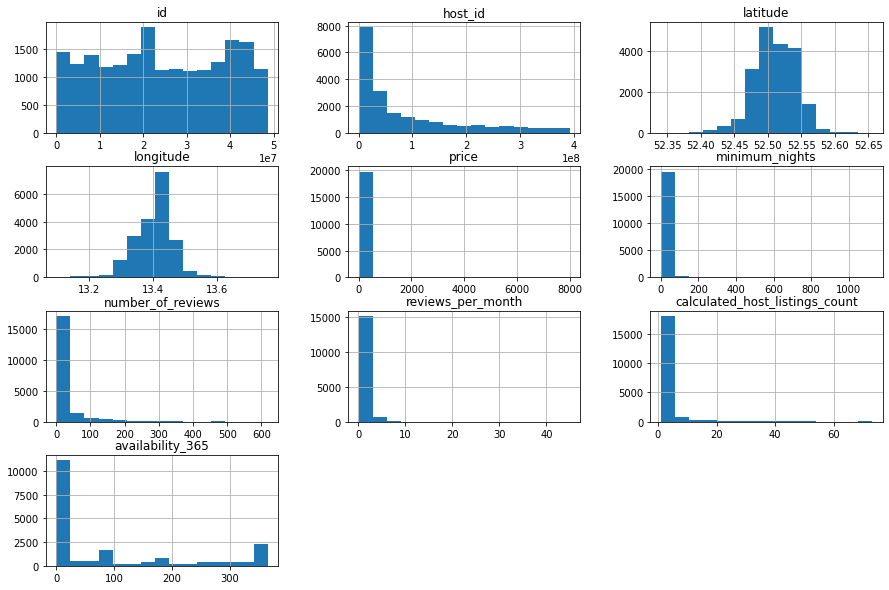

In [21]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


In [ ]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

## Conclusões
